In [1]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt

In [2]:
def percentage (part, whole):
    return 100 * float(part)/float(whole)

In [3]:
consumerKey = "add your keys "
consumerSecret = "add consumer secret "
accessToken =  "add this " 
accessTokenSecret = "add token secret " 

In [4]:
auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth)

In [5]:
searchTerm = input("Enter keyword/hashtag to search about: ")
noOfSearchTerms = int(input("Enter how many tweets to analyze: "))

Enter keyword/hashtag to search about: bitcoin
Enter how many tweets to analyze: 5


In [6]:
tweets = tweepy.Cursor(api.search, q=searchTerm ,lang="English").items(noOfSearchTerms)

In [7]:
positive = 0
negative = 0
neutral = 0
polarity = 0


In [8]:
for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    if (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1

TweepError: Twitter error response: status code = 400

In [9]:


positive = percentage(positive, noOfSearchTerms)
negative = percentage(positive, noOfSearchTerms)
neutral = percentage(positive, noOfSearchTerms)

positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')

In [10]:
print("How people are reacting on "+  searchTerm +" by analyzing "+ str(noOfSearchTerms)+" Tweets.")

if (polarity == 0):
    print("Neutral")
elif (polarity < 0):
    print("Negative")
elif (polarity > 0):
    print("Positive")


How people are reacting on bitcoin by analyzing 5 Tweets.
Neutral


In [11]:
str(neutral)

'0.00'

In [12]:
labels = ['Positive ['+str(positive)+'%]','Neutral ['+str(neutral)+'%]','Negative ['+ str(negative)+'%]']

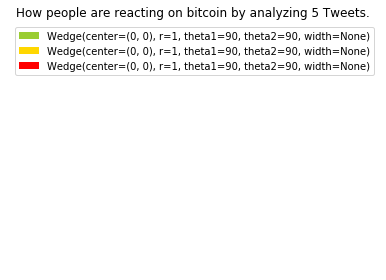

In [13]:

sizes = [positive, neutral, negative]
colors = ["yellowgreen",'gold','red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,loc="best")
plt.title("How people are reacting on "+  searchTerm +" by analyzing "+ str(noOfSearchTerms)+" Tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()